In [32]:
import os

from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

In [9]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('ENB2012_data.csv')
y_columns = ["Y1", "Y2"]
x_columns = [x for x in df.columns if x not in y_columns]
data_x = df[x_columns]
data_y = df[y_columns]
data_x.head()


,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [6]:
data_y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [26]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [27]:
num_input = len(x_columns)
num_output = len(y_columns)

In [30]:
train_mode = True
if train_mode:
    for i in range(num_output):
        print(f"Training for output #{i}")
        columns_names = x_columns + [y_columns[i]]
        train = pd.concat([train_x, train_y[y_columns[i]]], axis=1)
                
        x = x_columns
        y = y_columns[i]
        label = y
        model_path = f'./autogluon_models/model_{i}'
        
        predictor = TabularPredictor(label=label, problem_type='regression', eval_metric='mean_squared_error', path=model_path).fit(train, time_limit=None)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "./autogluon_models/model_0"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          8
Memory Avail:       13.19 GB / 31.85 GB (41.4%)
Disk Space Avail:   760.69 GB / 940.03 GB (80.9%)
Train Data

Training for output #0


		('int', [])       : 2 | ['X6', 'X8']
		('int', ['bool']) : 1 | ['X5']
	0.1s = Fit runtime
	8 features in original data used to generate 8 features in processed data.
	Train Data (Processed) Memory Usage: 0.03 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.13s ...
AutoGluon will gauge predictive performance using evaluation metric: 'mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 491, Val Rows: 123
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},

[1000]	valid_set's l2: 0.221524
[2000]	valid_set's l2: 0.195006


	-0.1936	 = Validation score   (-mean_squared_error)
	2.68s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3673	 = Validation score   (-mean_squared_error)
	1.17s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ...
	-0.1482	 = Validation score   (-mean_squared_error)
	10.29s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3213	 = Validation score   (-mean_squared_error)
	0.61s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		Exception occured in `AgSaveModelCallback` when calling event `after_epoch`:
	File C:\Users\ALCARA~1\AppData\Local\Temp\tmp7v9ry0lb\models\model.pth cannot be opened.
Detailed Traceback:
Traceback (most recent call last):
  File "C:\Users\alcarachin\Desktop\autoML_test\venv\lib\site-packages\autogluon\core\trainer\abstract_trainer.py", line 1817, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_va

[1000]	valid_set's l2: 0.246898


	-0.246	 = Validation score   (-mean_squared_error)
	2.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.8, 'XGBoost': 0.118, 'LightGBM': 0.059, 'LightGBMXT': 0.024}
	-0.1463	 = Validation score   (-mean_squared_error)
	0.29s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 42.21s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("./autogluon_models/model_0")
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy wit

Training for output #1


		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 6 | ['X1', 'X2', 'X3', 'X4', 'X5', ...]
		('int', [])   : 2 | ['X6', 'X8']
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     : 5 | ['X1', 'X2', 'X3', 'X4', 'X7']
		('int', [])       : 2 | ['X6', 'X8']
		('int', ['bool']) : 1 | ['X5']
	0.1s = Fit runtime
	8 features in original data used to generate 8 features in processed data.
	Train Data (Processed) Memory Usage: 0.03 MB (0.0% of available memory)
Data preprocessing and feature engineering runtime = 0.15s ...
AutoGluon will gauge predictive performance using evaluation metric: 'mean_squared_error'
	This metric's sign has been flipped to adhere to being higher_is_better. The metric score can be multiplied by -1 to get the metric value.
	To change this, specify the eval_metric parameter of Predictor()
Automatically generating train/validation split with holdout_frac=0.2, Trai

[1000]	valid_set's l2: 2.65843


	-2.6325	 = Validation score   (-mean_squared_error)
	1.45s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l2: 0.829873
[2000]	valid_set's l2: 0.693867
[3000]	valid_set's l2: 0.675211
[4000]	valid_set's l2: 0.665257
[5000]	valid_set's l2: 0.664307
[6000]	valid_set's l2: 0.65571
[7000]	valid_set's l2: 0.654342
[8000]	valid_set's l2: 0.648866
[9000]	valid_set's l2: 0.647715
[10000]	valid_set's l2: 0.645408


	-0.6452	 = Validation score   (-mean_squared_error)
	8.34s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.0157	 = Validation score   (-mean_squared_error)
	0.63s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	-0.4566	 = Validation score   (-mean_squared_error)
	2.53s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.1228	 = Validation score   (-mean_squared_error)
	0.59s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-10.9477	 = Validation score   (-mean_squared_error)
	3.56s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-1.0054	 = Validation score   (-mean_squared_error)
	0.96s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.1189	 = Validation score   (-mean_squared_error)
	6.91s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge ...


[1000]	valid_set's l2: 0.609604
[2000]	valid_set's l2: 0.597763
[3000]	valid_set's l2: 0.596731


	-0.5966	 = Validation score   (-mean_squared_error)
	4.53s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'CatBoost': 0.91, 'NeuralNetTorch': 0.08, 'ExtraTreesMSE': 0.01}
	-0.4508	 = Validation score   (-mean_squared_error)
	0.27s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 31.85s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("./autogluon_models/model_1")


In [33]:
models = []
for i in range(len(y_columns)):
    model_path = model_path = f'./autogluon_models/model_{i}'
    files = os.listdir(model_path)
    label = y_columns[i]
    
    predictor = TabularPredictor.load(path=model_path)
    models.append(predictor)
    print(f'Model {i} loaded')

Model 0 loaded
Model 1 loaded


In [43]:
for i in range(num_output):
    print(f"--------------------------------------------------")
    print(f"Testing for output #{i}")
    columns_names = x_columns + [y_columns[i]]
    test = pd.concat([test_x, test_y[y_columns[i]]], axis=1)
            
    x = x_columns
    y = y_columns[i]
    label = y
    predictor = models[i]
    
    ev = predictor.evaluate(test)
    for key in ev.keys():
        print(f'{key}: {ev[key]}')

--------------------------------------------------
Testing for output #0
mean_squared_error: -0.13730501904022688
root_mean_squared_error: -0.3705469188108665
mean_absolute_error: -0.2589197306199506
r2: 0.9986826923387171
pearsonr: 0.9993470077064329
median_absolute_error: -0.17558017730712816
--------------------------------------------------
Testing for output #1
mean_squared_error: -0.5425054770612614
root_mean_squared_error: -0.7365497111948802
mean_absolute_error: -0.491613530988817
r2: 0.9941450285432246
pearsonr: 0.9970713487148072
median_absolute_error: -0.3158574676513668


  0%|          | 0/1 [00:00<?, ?it/s]

[-3.27471356 -1.31963985  0.9585866  -1.52861751 -3.11142531 -0.30889316
  2.12279501  0.0056044 ]


Text(0.5, 1.0, 'SHAP Values for AutoGluon - output index 0')

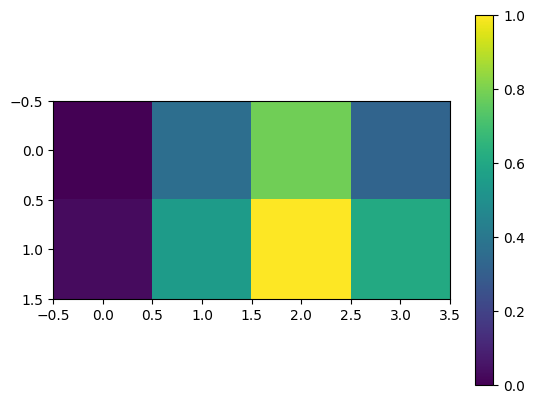

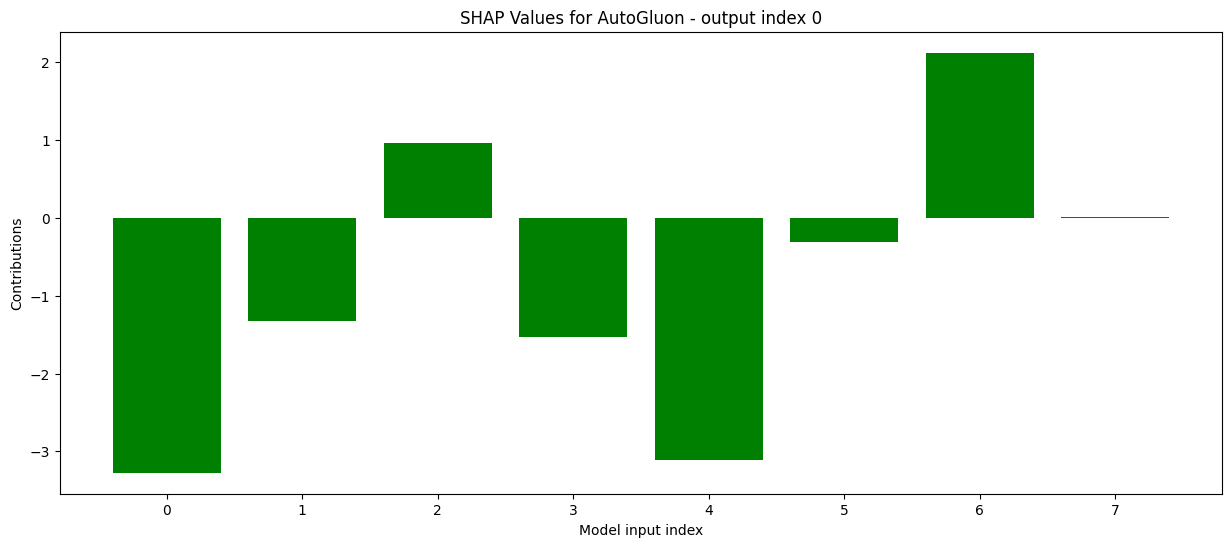

In [60]:
import shap
import matplotlib.pyplot as plt

np.random.seed(42)
y_index_to_explain = 0
predictor = models[y_index_to_explain] # I want to explain state estimation for node at index 0
columns_names = x_columns + [y_columns[y_index_to_explain]]


def wrapped_model(x):
    x = pd.DataFrame(x, columns=train_x.columns)
    preds = predictor.predict(x).to_numpy()
    return preds

to_be_explained = pd.DataFrame([test_x.iloc[0]], columns=test_x.columns)
background = train_x.sample(n=100)
explainer = shap.KernelExplainer(wrapped_model, background)
shap_values = explainer.shap_values(to_be_explained)
relevance = shap_values.ravel()


norm_relevance = ((relevance - min(relevance)) / (max(relevance) - min(relevance)))

print(relevance)
plt.imshow(norm_relevance.reshape((2, 4)))
plt.colorbar()

x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'SHAP Values for AutoGluon - output index {y_index_to_explain}')

Intercept 20.93730024095695
Prediction_local [18.16057287]
Right: 15.842507
[-3.72850716 -1.51503709  1.76095019 -3.15093772  0.01794391 -0.18335908
  3.29755957  0.72466002]


Text(0.5, 1.0, 'LIME for AutoGluon - output index 0')

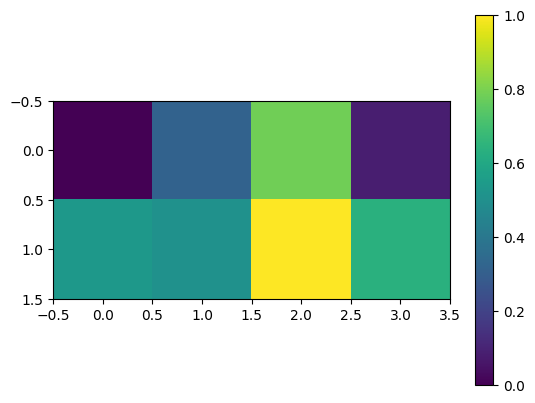

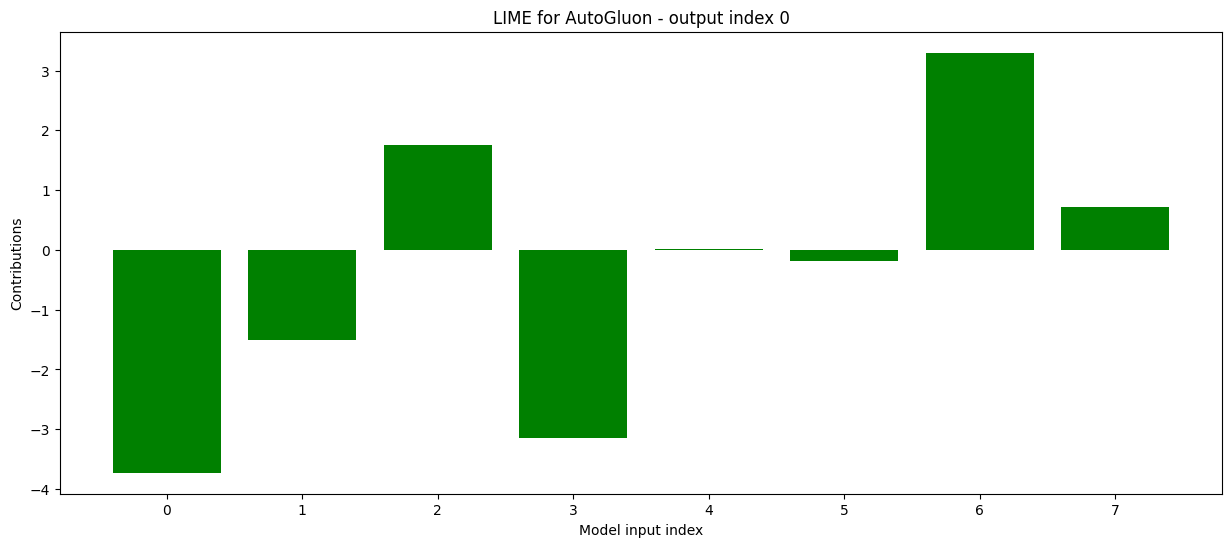

In [61]:
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
y_index_to_explain = 0
predictor = models[y_index_to_explain] # I want to explain state estimation for node at index 0
columns_names = x_columns + [y_columns[y_index_to_explain]]

def wrapped_net(x):
    x = pd.DataFrame(x, columns=train_x.columns)
    preds = predictor.predict(x).to_numpy()
    return preds

to_be_explained = pd.DataFrame([test_x.iloc[0]], columns=test_x.columns).to_numpy().ravel()
background = train_x.sample(n=100).to_numpy()

explainer = lime.lime_tabular.LimeTabularExplainer(
    background,
    feature_names=x_columns,
    verbose=True,
    mode='regression'
)

exp = explainer.explain_instance(to_be_explained, wrapped_net, num_features=num_input)
# exp.save_to_file('lime_explanationall.html')
# relevance = abs(np.asarray([float(i) for i in exp.domain_mapper.feature_values]))
relevance = np.asarray([j for i, j in sorted(exp.local_exp[1], key=lambda i: i[0])])


perc_relevance = 100 * relevance / sum(relevance)
# relevance = exp.local_exp[1]
norm_relevance = ((relevance - min(relevance)) / (max(relevance) - min(relevance)))


print(relevance)
plt.imshow(norm_relevance.reshape((2, 4)))
plt.colorbar()

x_positions = np.arange(len(relevance))
plt.figure(figsize=(15,6))
plt.bar(x_positions, relevance, color='green')
plt.xlabel('Model input index')
plt.ylabel('Contributions')
plt.title(f'LIME for AutoGluon - output index {y_index_to_explain}')
#plt.xticks(x_positions, ['A', 'B', 'C', 'D', 'E'])